In [1]:
!pip install unrar
!unrar x "/content/recordings.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/recordings.rar

Creating    recordings_filtered                                       OK
Creating    recordings_filtered/1                                     OK
Extracting  recordings_filtered/1/column1.txt                              0%  OK 
Extracting  recordings_filtered/1/column3.txt                              1%  OK 
Extracting  recordings_filtered/1/metadata.txt                             1%  OK 
Creating    recordings_filtered/10                                    OK
Extracting  recordings_filtered/10/column1.txt                             2%  OK 
Extracting  recordings_filtered/10/column3.txt                             3%  OK 
Extracting  recordings_filtered/10/metadata.txt                            3%  OK 
Creating    recordings_filtered/11                                    OK
Extracting  recordings_filtered/11/colu

In [2]:
import os
from datetime import datetime
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
from scipy.fft import fft
from scipy.signal import find_peaks
from itertools import groupby
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class Patient:
    def __init__(self, id, name, surname, test_date, breath_sensor, audio_sensor, is_sick):
        self.id = id  # Hasta numarası
        self.name = name  # Hastanın adı
        self.surname = surname  # Hastanın soyadı
        self.test_date = test_date  # Test tarihi (datetime objesi)
        self.breath_sensor = breath_sensor  # column1.txt verisi: integer listesi
        self.audio_sensor = audio_sensor  # column3.txt verisi: double dizisi (list of floats)
        self.is_sick = is_sick

    def __repr__(self):
      return (f"Id={self.id},Name={self.name}, Surname={self.surname}, Test_Date={self.test_date}, "
                f"breath_sensor={self.breath_sensor}, audio_sensor={self.audio_sensor}, is_patient={self.is_sick}")

    def __repr__(self):
       return (f"Id={self.id} "
                f"breath_sensor={self.breath_sensor}, is_patient={self.is_sick}")

In [36]:
# 'recordings_filtered' klasörünün yolu
base_dir = '/content/recordings_filtered'

# Hasta nesnelerini saklamak için bir liste
patient_list = []

# 1'den 50'ye kadar olan klasörlerde döngü
for i in range(1, 51):
    folder_path = os.path.join(base_dir, str(i))  # Her bir klasörün yolu

    # column1.txt, column3.txt ve hasta bilgilerini içeren dosya yolları
    column1_path = os.path.join(folder_path, 'column1.txt')
    column3_path = os.path.join(folder_path, 'column3.txt')

    # Hasta bilgilerini içeren metadata.txt dosyasının yolu
    metadata_path = os.path.join(folder_path, 'metadata.txt')

    try:
        with open(column1_path, 'r') as file1, open(column3_path, 'r') as file3, open(metadata_path, 'r') as meta_file:

            id = i

            if(i<=35):
              is_sick = False
            else:
              is_sick = True

            # column1.txt içeriğini integer listesine çevir
            breath_sensor_raw = list(map(int, file1.read().strip()[1:-1].split('\n')))
            breath_sensor = [abs(4095 - x) for x in breath_sensor_raw[1:-1]]

            # column3.txt içeriğini bir double dizisine çevir
            audio_sensor = list(map(float, file3.read().strip().split()))

            # metadata.txt dosyasından hasta bilgilerini al (ad, soyad, test tarihi)
            metadata_lines = meta_file.read().strip().split('\n')

            # Patient Name: John Doe satırından adı al
            name_surname = metadata_lines[0].replace("Patient Name: ", "")
            name, surname = name_surname.split(" ", 1)  # Ad ve soyadı ayır

            # Date: 2025-03-22_16-43-37 satırından test tarihini al
            test_date_str = metadata_lines[1].replace("Date: ", "")
            # Test tarihini datetime objesine dönüştür (Date: 2025-03-22_16-43-37 formatı)
            test_date = datetime.strptime(test_date_str, '%Y-%m-%d_%H-%M-%S')

            # Yeni Hasta nesnesini oluştur
            patient = Patient(id, name, surname, test_date, breath_sensor, audio_sensor, is_sick)

            # Hasta nesnesini listeye ekle
            patient_list.append(patient)
    except FileNotFoundError:
        print(f"Dosya bulunamadı: {folder_path}")
        continue

# Listeyi görüntüle (isteğe bağlı)
for patient in patient_list:
    print(patient)

Id=1 breath_sensor=[0, 0, 0, 0, 0, 0, 0, 0, 0, 68, 231, 702, 858, 1176, 1185, 1326, 1346, 1586, 1743, 2044, 2414, 1997, 1600, 1126, 748, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 156, 545, 1353, 2160, 2557, 3108, 3195, 2851, 2662, 2743, 2272, 2192, 2368, 2296, 2293, 2460, 2063, 1424, 878, 402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 640, 1451, 2266, 3084, 3902, 3961, 3374, 3124, 2781, 2573, 2487, 2906, 2496, 2021, 1412, 799, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 307, 1025, 1813, 2622, 3441, 3953, 4040, 4064, 4070, 4052, 4033, 4020, 3608, 2794, 1993, 1192, 402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], is_patient=False
Id=2 breath_sensor=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 222, 688, 1489, 2274, 3092, 3683, 4029, 4047, 4069, 4065, 4035, 4021, 4015, 3845, 3030, 2248, 1450, 637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 307, 1109, 1922, 2724, 3540, 4042, 

In [22]:
sample_healthy_patients = [patient_list[9], patient_list[25], patient_list[30]]

In [23]:
sample_sick_patients = [patient_list[37], patient_list[45], patient_list[48]]

In [39]:
def plot_time_series_for_patients(patients, is_sick, sample_period=1):
    num_patients = len(patients)  # Hasta sayısı

    fig, axes = plt.subplots(nrows=num_patients, ncols=1, figsize=(8, 4 * num_patients))
    # Hasta sayısına göre alt grafikler oluştur

    if num_patients == 1:
        axes = [axes]  # Tek hasta varsa liste haline getir

    for i, patient in enumerate(patients):
        y_values = patient.breath_sensor  # Nefes sensörü değerleri
        x_values = np.arange(0, len(y_values) * sample_period, sample_period)  # Eşit aralıklı zaman noktaları

        axes[i].plot(x_values, y_values, marker='o', linestyle='-', color="skyblue", label=f"Hasta {patient.id}")
        axes[i].set_xlabel("Zaman (Örnekleme Periyodu)")
        axes[i].set_ylabel("Nefes Sensörü Değeri")
        axes[i].set_title(f"Hasta {patient.id} Nefes Sensörü Zaman Serisi")
        axes[i].grid(True)
        axes[i].legend()

    main_title = "KOAH Hastalarının Nefes Sensörü Zaman Serisi" if is_sick else "Sağlıklı Kişilerin Nefes Sensörü Zaman Serisi"
    fig.suptitle(main_title, fontsize=14, fontweight="bold")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Başlık sıkışmasını önle
    plt.show()

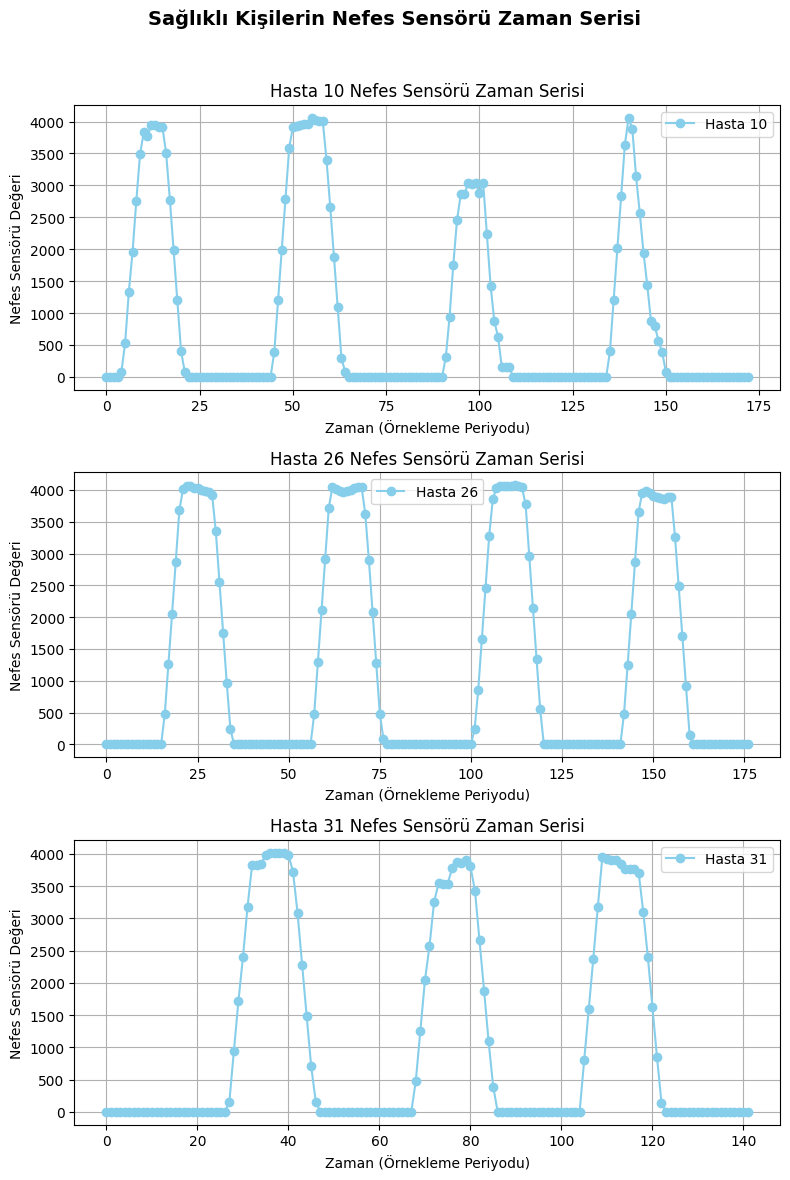

In [38]:
plot_time_series_for_patients(sample_healthy_patients,False)

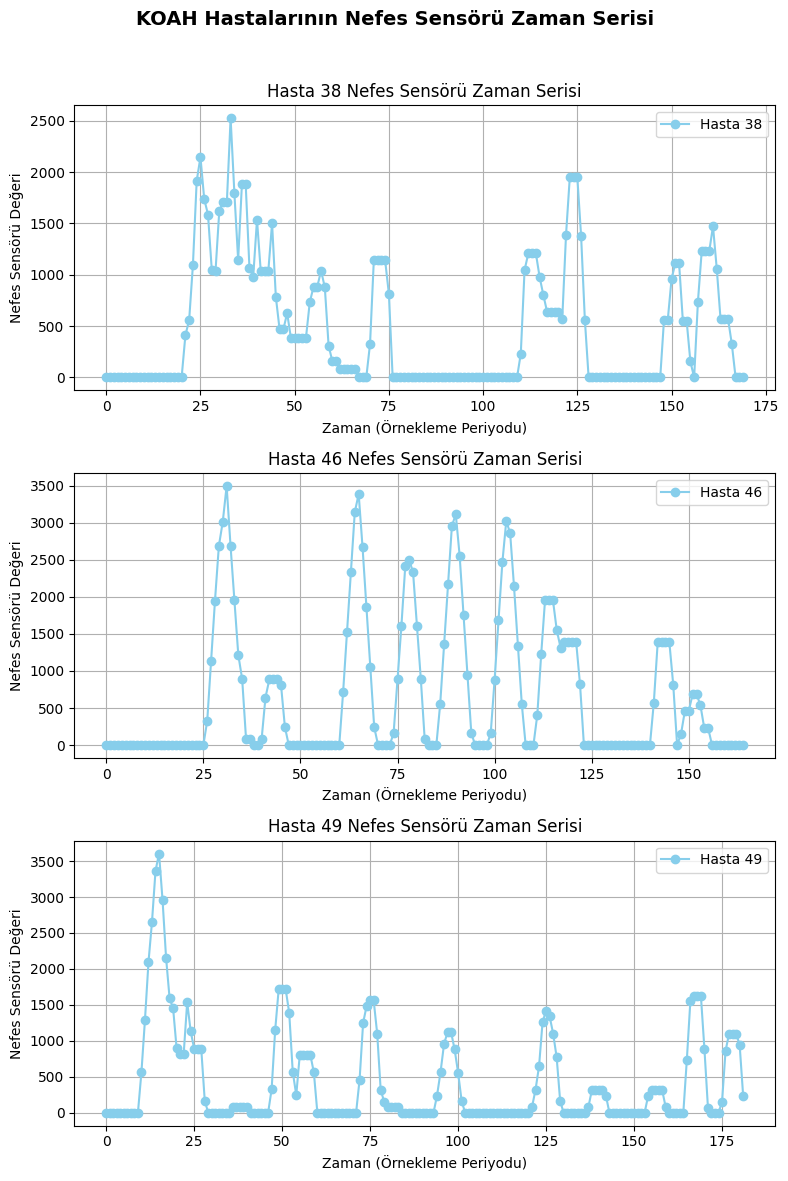

In [40]:
plot_time_series_for_patients(sample_sick_patients,True)

**TEMEL İSTATİKSEL ÖZELLİKLER**

mean_force: Sensör verisinin ortalama değeri. Hastanın solunum kuvvetinin genel seviyesini gösterir.

std_force: Kuvvet verisinin standart sapması. Solunum kuvvetindeki dalgalanmaları ifade eder. Daha büyük değerler, düzensiz bir solunum modeline işaret edebilir.

min_force: Solunum kuvvetinin en düşük değeri. KOAH hastalarında minimum kuvvet, solunum zayıflığını gösterebilir.

max_force: Solunum kuvvetinin en yüksek değeri. Zirve kuvvet, hastanın ne kadar güçlü nefes alabildiğini belirler.

skewness: Kuvvet dağılımının simetrisizliğini gösterir. Asimetrik solunum desenleri KOAH hastalarında görülebilir.

kurtosis: Kuvvet dağılımının sivriliğini ölçer. Anormal zirve noktaları olup olmadığını analiz etmek için kullanılır.

**NEFES DALGASI ÖZELLİKLERİ**

num_peaks: Nefes alma sırasında meydana gelen zirve sayısı. KOAH hastalarında düzensiz zirveler olabilir.

num_troughs: Nefes verme sırasında meydana gelen çukur sayısı. Daha fazla çukur, nefes verme zorluğuna işaret edebilir.

avg_peak_height: Ortalama nefes alma zirvesi. Hastanın soluk alırken ulaştığı maksimum kuvveti gösterir.

avg_trough_depth: Ortalama nefes verme derinliği. Hastanın ne kadar kuvvetli nefes verebildiğini gösterir.

breath_amplitude: Ortalama nefes alma ve verme farkı. Düşük değerler, KOAH hastalarında yetersiz hava değişimini gösterebilir.

peak_variability: Zirve yüksekliklerinin değişkenliği. Daha düzensiz zirveler, solunum bozukluklarını gösterebilir.

trough_variability: Çukur seviyelerinin değişkenliği. Düzensiz nefes verme paterni KOAH hastalarında sık görülür.

max_cluster: En uzun süreyle aynı maksimum değerde kalan bölge. Nefes alırken veya verirken sabit kalma eğilimi varsa, KOAH hastaları için patolojik olabilir.

**KOAH İÇİN KRITİK METRİKLER**

fev1_fvc_ratio: Zorla ekspiratuar hacim (FEV1) / Zorla vital kapasite (FVC) oranı. KOAH teşhisi için en kritik ölçümlerden biridir. Değer %70'in altındaysa KOAH riski yüksektir.

pef (Peak Expiratory Flow): Zirve nefes verme hızı. KOAH hastalarında genellikle düşüktür.

breath_duration: Bir nefes döngüsünün süresi. KOAH hastalarında nefes alma süresi genellikle uzar.

slope: Solunum gücünün zaman içindeki değişimi. Nefes verme sürecindeki eğim değişiklikleri hastalığın şiddetini gösterebilir.

In [28]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis
from itertools import groupby
from scipy.fft import fft

def extract_all_features(sensor_data, timestamps=None, max_val=4095):
    """KOAH hastalığı tespiti için nefes verisinden özellikler çıkarır"""

    # Sensör verisini NumPy array'e çevir
    sensor_data = np.array(sensor_data)

    # Eğer zaman verisi sağlanmadıysa, indeks numarasını zaman olarak kabul et
    if timestamps is None:
        timestamps = np.arange(len(sensor_data))
    else:
        timestamps = np.array(timestamps)

    # Zirve (peak) ve çukur (trough) noktalarını bul
    peaks, _ = find_peaks(sensor_data, height=max_val * 0.8, distance=10)
    troughs, _ = find_peaks(max_val - sensor_data, height=max_val * 0.8, distance=10)

    peak_values = sensor_data[peaks] if len(peaks) > 0 else [0]
    trough_values = sensor_data[troughs] if len(troughs) > 0 else [0]

    # FEV1/FVC oranı (KOAH teşhisinde kullanılan en önemli metriklerden biri)
    fev1 = np.percentile(sensor_data, 75)  # Yaklaşık ilk %75'lik değer
    fvc = np.sum(sensor_data)  # Toplam nefes kapasitesi (yaklaşık hesaplama)
    fev1_fvc_ratio = fev1 / fvc if fvc != 0 else 0

    # PEF (Peak Expiratory Flow) - Zirve nefes verme hızı
    pef = np.max(sensor_data)

    # Solunum süresi
    breath_duration = timestamps[-1] - timestamps[0] if len(timestamps) > 1 else 0

    # Eğilim (Trend) hesaplama
    slope = np.polyfit(timestamps, sensor_data, 1)[0] if len(sensor_data) > 1 else 0

    # Frekans alanı analizi (Fourier Transform)
    fft_coeffs = np.abs(fft(sensor_data))[:10]  # İlk 10 bileşeni al

    # Özellikleri hesapla
    features = {
        # Temel istatistiksel özellikler
        'mean_force': np.mean(sensor_data),
        'std_force': np.std(sensor_data),
        'min_force': np.min(sensor_data),
        'max_force': np.max(sensor_data),
        'skewness': skew(sensor_data),
        'kurtosis': kurtosis(sensor_data),

        # Nefes dalgası özellikleri
        'num_peaks': len(peaks),
        'num_troughs': len(troughs),
        'avg_peak_height': np.mean(peak_values),
        'avg_trough_depth': np.mean(trough_values),
        'breath_amplitude': np.mean(peak_values) - np.mean(trough_values) if len(peaks) > 0 and len(troughs) > 0 else 0,
        'peak_variability': np.std(peak_values) if len(peaks) > 1 else 0,
        'trough_variability': np.std(trough_values) if len(troughs) > 1 else 0,
        'max_cluster': max(len(list(g)) for k, g in groupby(sensor_data == max_val)) if max_val in sensor_data else 0,

        # KOAH için kritik özellikler
        'fev1_fvc_ratio': fev1_fvc_ratio,  # KOAH teşhisi için kritik oran
        'pef': pef,  # Zirve nefes verme hızı
        'breath_duration': breath_duration,  # Nefes süresi
        'slope': slope,  # Nefes gücünün zaman içindeki değişim eğilimi

        # Frekans alanı özellikleri
        'fft_coeff_1': fft_coeffs[0] if len(fft_coeffs) > 0 else 0,
        'fft_coeff_2': fft_coeffs[1] if len(fft_coeffs) > 1 else 0,
        'fft_coeff_3': fft_coeffs[2] if len(fft_coeffs) > 2 else 0,
        'fft_coeff_4': fft_coeffs[3] if len(fft_coeffs) > 3 else 0,
        'fft_coeff_5': fft_coeffs[4] if len(fft_coeffs) > 4 else 0,
    }

    return features


In [12]:
pd.set_option("display.max_columns", None)

In [29]:
# Özellik çıkarma fonksiyonunu kullanarak her bir hasta için verileri işleme
patient_features = []

for patient in patient_list:
    # Breathing sensor verisi (column1.txt) kullanarak özellikleri çıkar
    features = extract_all_features(patient.breath_sensor, timestamps=None, max_val=4095)

    # Özellikleri hasta bilgisiyle birleştir
    patient_data = {
        #'id': patient.id,
        #'name': patient.name,
        #'surname': patient.surname,
        #'test_date': patient.test_date,
        'is_sick': patient.is_sick,
    }

    # Özellikleri hasta verilerine ekle
    patient_data.update(features)

    # Özellikleri listeye ekle
    patient_features.append(patient_data)

# Özellikleri DataFrame'e çevir
df = pd.DataFrame(patient_features)

In [30]:
df

,is_sick,mean_force,std_force,min_force,max_force,skewness,kurtosis,num_peaks,num_troughs,avg_peak_height,avg_trough_depth,breath_amplitude,peak_variability,trough_variability,max_cluster,fev1_fvc_ratio,pef,breath_duration,slope,fft_coeff_1,fft_coeff_2,fft_coeff_3,fft_coeff_4,fft_coeff_5
0,False,936.707006,1296.087981,0,4070,1.083587,-0.206339,2,3,4015.500000,0.000000,4015.500000,54.500000,0.000000,0,0.013579,4070,156,1.800489,147063.0,24359.070564,28560.969876,27022.603436,109089.358482
1,False,1033.236842,1594.445126,0,4090,1.101097,-0.577035,3,2,4070.333333,0.000000,4070.333333,15.542058,0.000000,0,0.014089,4090,151,-1.499631,157052.0,47019.648983,52246.729326,53380.960894,123933.934552
2,False,1315.154839,1693.911283,0,4095,0.738854,-1.241116,4,3,4089.000000,0.000000,4089.000000,4.636809,0.000000,125,0.014918,4095,154,-6.666382,203849.0,17659.666571,13065.680430,18859.679257,157693.730171
3,False,1260.790541,1670.475504,0,4093,0.803562,-1.124447,4,3,4082.250000,0.000000,4082.250000,10.425330,0.000000,0,0.015219,4093,147,1.247295,186597.0,4781.604817,5609.832512,19718.803498,151680.564094
4,False,1054.289474,1612.661031,0,4092,1.068984,-0.657561,3,2,4063.666667,0.000000,4063.666667,31.329787,0.000000,0,0.013920,4092,151,0.477816,160252.0,47769.234919,56066.034896,50526.640786,125342.869748
5,False,1320.820225,1672.729752,0,4087,0.710543,-1.268315,5,4,4058.000000,0.000000,4058.000000,28.802778,0.000000,0,0.013263,4087,177,0.592328,235106.0,5802.641886,15702.955013,37109.904290,95148.940914
6,False,1067.884848,1475.829289,0,4069,0.922046,-0.832259,4,3,3826.000000,0.000000,3826.000000,219.510820,0.000000,0,0.013683,4069,164,1.851246,176201.0,34916.230882,21742.578951,27855.456956,110207.508776
7,False,841.508982,1386.053463,0,3998,1.275699,-0.093154,3,2,3881.000000,0.000000,3881.000000,82.957821,0.000000,0,0.010731,3998,166,2.257861,140532.0,17883.152628,44171.943368,110579.632720,49792.192289
8,False,706.270115,1198.554854,0,4032,1.502322,0.848180,3,3,3754.666667,0.000000,3754.666667,213.699685,0.000000,0,0.009258,4032,173,-4.232552,122891.0,23227.813200,15429.109099,18995.020922,108840.676034
9,False,926.450867,1418.675530,0,4059,1.194971,-0.217809,3,3,4018.666667,0.000000,4018.666667,54.236109,0.000000,0,0.011755,4059,172,-6.792923,160276.0,29131.291829,11174.536948,18441.938085,137304.352708


In [31]:
labels = []

for patient in patient_list:
    labels.append(patient.is_sick)

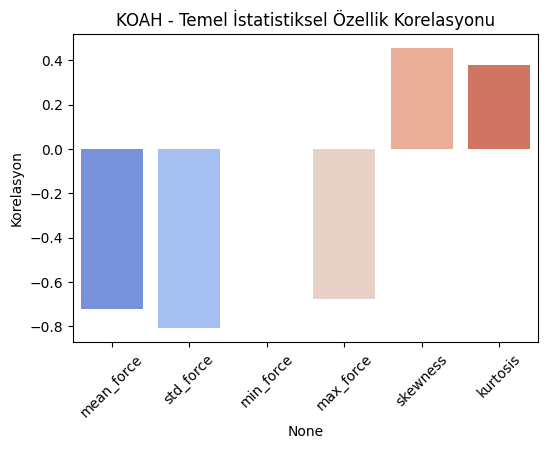

In [32]:
# Temel istatistiksel özellikler
basic_stats = df[['mean_force', 'std_force', 'min_force', 'max_force', 'skewness', 'kurtosis']].copy()
basic_stats['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_basic = basic_stats.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir;
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_basic.index, y=corr_basic.values, palette='coolwarm', hue=corr_basic.index)
plt.xticks(rotation=45)
plt.title("KOAH - Temel İstatistiksel Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

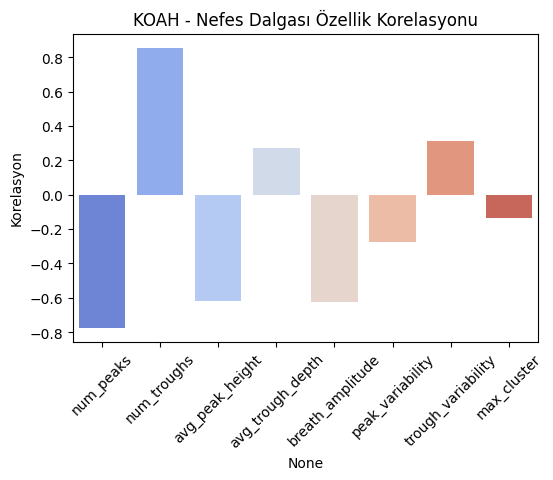

In [33]:
# Nefes dalgasına özel özellikler
breath_features = df[['num_peaks', 'num_troughs', 'avg_peak_height','avg_trough_depth','breath_amplitude','peak_variability','trough_variability','max_cluster']].copy()
breath_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_breath = breath_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_breath.index, y=corr_breath.values, palette='coolwarm', hue=corr_breath.index)
plt.xticks(rotation=45)
plt.title("KOAH - Nefes Dalgası Özellik Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

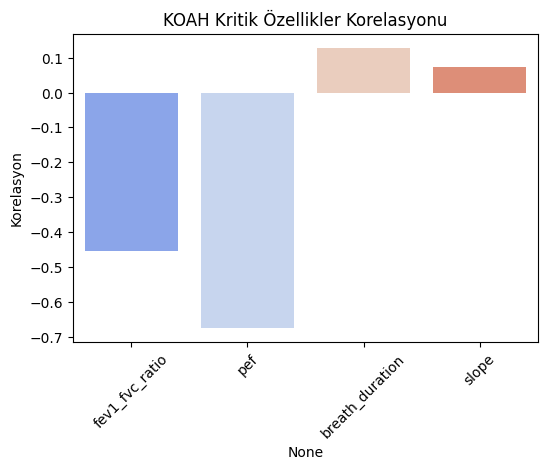

In [34]:
# KOAH için kritik özellikler
freq_features = df[['fev1_fvc_ratio', 'pef', 'breath_duration', 'slope']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Kritik Özellikler Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

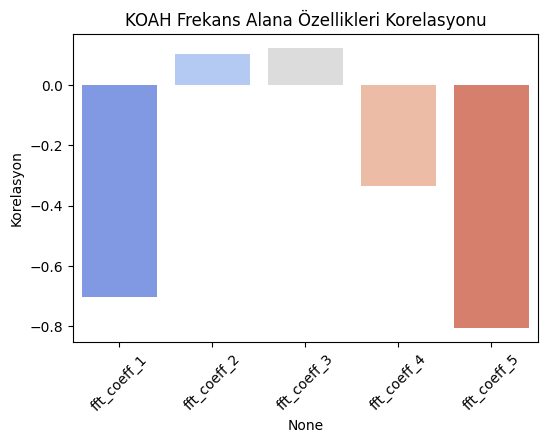

In [35]:
# KOAH için frekans alanı özellikler
freq_features = df[['fft_coeff_1', 'fft_coeff_2', 'fft_coeff_3', 'fft_coeff_4', 'fft_coeff_5']].copy()
freq_features['is_sick'] = labels  # .loc ile veri ekleme

# Korelasyon hesapla
corr_freq = freq_features.corr()['is_sick'].drop('is_sick')

# Korelasyonu görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x=corr_freq.index, y=corr_freq.values, palette='coolwarm', hue=corr_freq.index)
plt.xticks(rotation=45)
plt.title("KOAH Frekans Alana Özellikleri Korelasyonu")
plt.ylabel("Korelasyon")
plt.show()

In [ ]:
!cp -r "/content/recordings_filtered" "/content/drive/MyDrive/bitirmeProjesi/"